In [1]:
# import stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint
from functools import partial
import numpy as np
import torch
import pickle

In [2]:
import InferSent
from InferSent.models import InferSent
V = 2
MODEL_PATH = './InferSent/encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [3]:
W2V_PATH = './InferSent/dataset/fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)

In [4]:
f = open("../data/plot_summaries.txt")
dict = {}
sentences = []
for movie in f.readlines():
    movie_id, plot = movie.split('\t')
    for sentence in plot.split('.'):
        sentences.append(sentence)

In [5]:
len(sentences)

740840

In [7]:
model.build_vocab_k_words(K=100000)
model.update_vocab(sentences, tokenize=True)

Vocab size : 100000
Found 78162(/131181) words with w2v vectors
New vocab size : 178165 (added 78162 words)


In [9]:
embeddings = model.encode(sentences[200:300], verbose=True)

Nb words kept : 2425/2448 (99.1%)
Speed : 42.0 sentences/s (cpu mode, bsize=64)


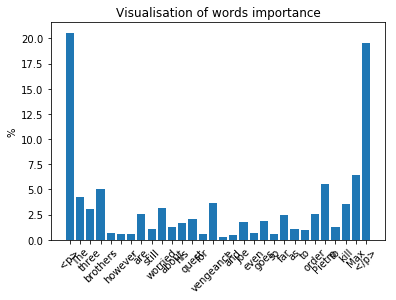

In [17]:
idx = randint(0, len(sentences))
_, _ = model.visualize(sentences[idx])